# Тема проекта "Mobile phone price analytics"

### Анализ и изучение датасета о характеристиках, классификации телефонов



# Описание проекта

### Данный проект содержит информацию о ценах на мобильные телефоны разных брендов. Он включает такие данные, как объем памяти, оперативная память, размер экрана, характеристики камеры, емкость аккумулятора и цену каждого устройства.

# Цели и задачи проекта

### **Цели:**
* **Научиться работать с Датасетом, исследовать характеристики телефонов**;
* **Изучить спецификации телефонов**;
* **Построить модель для оценки стоимости телефонов**.

### **Задачи:**
* **Подготовка Датасета к дальнейшему анализу**;
* **Построить грфики, для общего анализа данных**;
* **Произвести статистический анлиз**.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
phone_price = pd.read_csv('Mobile phone price.csv', encoding='latin-1')

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
phone_price

,ï»¿Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [71]:
#  Возвращает первые 5 строк DataFrame
phone_price.head()

,ï»¿Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [72]:
# Возвращает последние 5 строк DataFrame
phone_price.tail()

,ï»¿Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


In [73]:
# Выводит информацию о DataFrame (кол-во запю, кол-во ненул. знач. в столбцах,
# типы данных и использ. памяти
# Для понимания структуры и характеристики данных
phone_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ï»¿Brand                407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [146]:
# Проверка пропусков
print(phone_price.isnull().sum())

brand                      0
model                      0
storage                    0
ram                        0
screen_size_in_inches      0
camera_in_mp               0
battery_capacity_in_mah    0
price_in_dollar            0
dtype: int64


In [147]:
# Заполнение пропусков нулями
phone_price = phone_price.fillna(0)

In [74]:
# Возвращает случайные 8 строк
# для получения представительного образца данных
phone_price.sample(8)

,ï»¿Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
352,Xiaomi,Mi 11 Lite,128,6,6.55,64+8+5,4250,399
49,Oppo,A16s,64 GB,4 GB,6.52,13 + 2 + 2,5000,179
336,Nokia,3.4,64,4,6.39,13+5+2,4000,179
12,Realme,GT Neo2,128 GB,8 GB,6.62,64 + 8 + 2,5000,329
258,Samsung,Galaxy M31s,128GB,8GB,6.5,64MP + 12MP + 5MP + 5MP,6000,$349
370,Samsung,Galaxy A21s,128,6,6.5,48+8+2+2,5000,199
138,Realme,GT Neo2,128GB,8GB,6.62,64MP + 8MP + 2MP,5000,$399
88,LG,Wing,256GB,8GB,6.8 + 3.9,64MP + 13MP + 12MP,4000,$999


In [75]:
# Возвращает список названий столбцов
# для получения списка всех доступных переменных
phone_price.columns.tolist()

['ï»¿Brand',
 'Model',
 'Storage ',
 'RAM ',
 'Screen Size (inches)',
 'Camera (MP)',
 'Battery Capacity (mAh)',
 'Price ($)']

In [76]:
# Возвращает количество ненулевых (не NaN) значений в каждом столбце
phone_price.count()

,0
ï»¿Brand,407
Model,407
Storage,407
RAM,407
Screen Size (inches),407
Camera (MP),407
Battery Capacity (mAh),407
Price ($),407


In [77]:
# Знакомство с типами данных
phone_price.dtypes

,0
ï»¿Brand,object
Model,object
Storage,object
RAM,object
Screen Size (inches),object
Camera (MP),object
Battery Capacity (mAh),int64
Price ($),object


In [78]:
# Кол-во строк/столбцов
phone_price.shape

(407, 8)

Датасет **Mobile phone price** содержит информацию о  ценах на мобильные телефоны от разных брендов. Он включает такие сведения, как объем памяти, оперативная память, размер экрана, характеристики камеры, емкость аккумулятора и цена каждого устройства.<br>

### Основная информация о Датасете:
Датасет содержит информацию о 407 различных телефонах.

• **Brand** (*производитель телефона*)

• **Model** (*название модели телефона*)

• **Storage** (*объем измеряется в гигабайтах*)

• **RAM** (*объем измеряется в гигабайтах*)

• **Screen Size** (размер экрана телефона в дюймах*)

• **Camera** (*количество мегапикселей в задней камере (камерах) телефона*)

• **Battery Capacity** (*емкость аккумулятора телефона в миллиампер-часах*)

• **Price** (*розничная цена телефона в долларах США (`$`).*)

***Каждая строка представляет разные модели мобильных телефонов. Полученные данные можно использовать для анализа тенденций ценообразования и сравнения характеристик и цен на различные мобильные телефоны.***

### **Выводы**

1. В датафрейме присутствуют **407 записей**, **8 столбцов**, в памяти он занимает **25,6 кб**.
2. В столбцах не имеется **пропущенных значений**.
3. Нарушение стиля в заголовке столбца **присутствуют заглавные буквы, проебыл между слов, а так же непонятные знаки**, следует изменить регистр. (*Исправил нзвания столбцов, теперь они нчинются с маленькой буквы, между слов нет пробелов. Пример: из Screen Size (inches) в screen_size_in_inches*)
4. Для ряда столбцов видится возможным **изменение типа данных** для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях). (*в столбцах storage, ram,  screen_size_in_inches, camera_in_mp,  battery_capacity_in_mah,  price_in_dollar были изменены типы данных*)

## 2. Переименование неправильного наименования столбцов

In [106]:
phone_price.rename(columns = {'ï»¿Brand': 'brand'}, inplace = True)
phone_price.rename(columns = {'Model': 'model'}, inplace = True)
phone_price.rename(columns = {'Screen Size (inches)': 'screen_size_in_inches'}, inplace = True)
phone_price.rename(columns = {'Camera (MP)': 'camera_in_mp'}, inplace = True)
phone_price.rename(columns = {'Battery Capacity (mAh)': 'battery_capacity_in_mah'}, inplace = True)
phone_price.rename(columns = {'Price ($)': 'price_in_dollar'}, inplace = True)
phone_price.rename(columns = {'Storage ': 'storage'}, inplace = True)
phone_price.rename(columns = {'RAM ': 'ram'}, inplace = True)
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone 13 Pro,128,6,6.1,36.0,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,140.0,5000,1199
2,OnePlus,9 Pro,128,8,6.7,108.0,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel 6,128,8,6.4,62.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,88.0,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,36.0,3687,1099
405,Oppo,Reno3,128,8,6.4,71.0,4025,429


## 3. Изменение некорректного значения столбцов

In [107]:
# Для начала имеются столбцы Storage и ram, в которых необходимо убрать GB и MP
#  для того, чтобы изменить их тип в дльнейшем
phone_price.sample(8)

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
210,Xiaomi,Redmi 10 Prime,128,6,6.5,62.0,6000,$199
134,Vivo,Y33s,128,8,6.58,52.0,5000,$279
177,Samsung,Galaxy A52s 5G,128,6,6.5,86.0,4500,$469
37,OnePlus,Nord 2 5G,128,8,6.43,60.0,4500,399
176,Motorola,Moto G Power 2021,64,4,6.6,50.0,5000,$199
185,Samsung,Galaxy F41,128,6,6.4,77.0,6000,$239
280,Nokia,3.1 Plus,32,3,6,18.0,3500,$139
222,Xiaomi,Mi 11 Lite 5G,128,8,6.55,77.0,4250,$429


In [119]:
print(phone_price['storage'].unique())

[128 256  64  32 512]


In [118]:
phone_price['storage'] = phone_price['storage'].replace({'GB': '', ',': '', ' ': ''}, regex=True)
print(phone_price['storage'].unique())

[128 256  64  32 512]


In [109]:
# Как мы видим, мы убрали GB
phone_price.sample(8)

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
133,Samsung,Galaxy A52s 5G,128,6,6.5,86.0,4500,$449
316,Samsung,Galaxy A12,128,4,6.5,57.0,5000,179
248,Oppo,A16,32,3,6.52,17.0,5000,$149
157,Xiaomi,Poco X3 GT,128,8,6.6,74.0,5000,$299
196,Samsung,Galaxy A42 5G,128,4,6.6,66.0,5000,$329
109,Motorola,Moto E7i Power,32,2,6.5,15.0,5000,$99
21,Samsung,Galaxy A22 5G,128,4,6.6,53.0,5000,279
262,Nokia,1.4,32,2,6.51,10.0,4000,$119


In [92]:
print(phone_price['ram'].unique())

['6 ' '12 ' '8 ' '4 ' '3 ' '2 ' '4' '8' '6' '12' '3' '2' '5' '16']


In [116]:
phone_price['ram'] = phone_price['ram'].replace({'GB': '', ',': '', ' ': ''}, regex=True)
print(phone_price['ram'].unique())

[ 6 12  8  4  3  2  5 16]


In [117]:
phone_price.sample(8)

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
66,Oppo,F19Pro,128,8,6.43,60.0,4310,359
310,Xiaomi,RedmiNote10Pro,128,6,6.67,123.0,5020,279
167,Samsung,GalaxyM525G,128,6,6.7,86.0,5000,449
34,Vivo,Y33s,128,8,6.58,54.0,5000,279
364,Xiaomi,PocoM3,128,4,6.53,52.0,6000,179
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
233,Realme,Narzo50A,64,4,6.5,52.0,5000,149
342,Huawei,P30Pro,256,8,6.47,68.0,4200,999


In [111]:
# Имеется столбик price_in_dollar, в котором следует убрать $, (,), ( )
# Для того, чтобы в дальнейшем изменить его тип данных на int64
print(phone_price['price_in_dollar'].unique())

['999' '1199' '899' '279' '799' '249' '699' '329' '449' '199' '299' '379'
 '179' '729' '599' '139' '189' '399' '259' '159' '229' '499' '129' '529'
 '369' '1099' '169' '99' '459' '239' '1299' '429' '659' '269' '359'
 '$799 ' '$399 ' '$699 ' '$329 ' '$999 ' '$549 ' '$1,299 ' '$899 ' '$449 '
 '$319 ' '$269 ' '$349 ' '$279 ' '$249 ' '$299 ' '$969 ' '$1,199 ' '$149 '
 '$139 ' '$99 ' '$199 ' '$169 ' '$499 ' '$179 ' '$219 ' '$229 ' '$239 '
 '$109 ' '$189 ' '$389 ' '$309 ' '$369 ' '$129 ' '$849 ' '$469 ' '$209 '
 '$119 ' '$339 ' '$429 ' '$159 ' '$379 ' '$289 ' '130' '749' '149' '969'
 '649' '349' '419' '1399' '1999' '119' '319' '1049']


In [113]:
phone_price['price_in_dollar'] = phone_price['price_in_dollar'].replace({'\$': '', ',': '', ' ': ''}, regex=True)
print(phone_price['price_in_dollar'].unique())

['999' '1199' '899' '279' '799' '249' '699' '329' '449' '199' '299' '379'
 '179' '729' '599' '139' '189' '399' '259' '159' '229' '499' '129' '529'
 '369' '1099' '169' '99' '459' '239' '1299' '429' '659' '269' '359' '549'
 '319' '349' '969' '149' '219' '109' '389' '309' '849' '469' '209' '119'
 '339' '289' '130' '749' '649' '419' '1399' '1999' '1049']


In [96]:
print(phone_price['camera_in_mp'].unique())

['12 + 12 + 12' '108 + 10 + 10 + 12' '48 + 50 + 8 + 2' '64 + 8 + 5 + 2'
 '50 + 12.2' '12 + 12' '48 + 8 + 2 + 2' '50 + 13 + 16 + 2'
 '50 + 48 + 12 + 8' '64 + 8 + 2' '64 + 12 + 5 + 5' '50 + 50 + 13 + 3'
 '64 + 8 + 5' '64 + 12 + 12' '50 + 2 + 2' '48 + 2 + 2' '50 + 8 + 2 + 2'
 '48 + 5' '48 + 50 + 2' '108 + 8 + 5 + 2' '13 + 2 + 2' '13 + 2' '12'
 '48 + 5 + 2' '50 + 8 + 2' '64 + 8 + 2 + 2' '48 + 8 + 5' '64 + 8'
 '48 + 5 + 2 + 2' '50 + 2' '64 + 12 + 8 + 5' '64 + 2' '48 + 13 + 13'
 '12MP + 12MP' '64MP + 12MP + 12MP' '50MP + 8MP + 2MP' '50MP + 12MP'
 '48MP + 8MP + 2MP + 2MP' '64MP + 8MP + 2MP' '50MP + 48MP + 12MP + 8MP'
 '50MP + 16MP + 13MP + 2MP' '108MP + 16MP + 8MP' '48MP + 13MP'
 '12MP + 12MP + 12MP' '64MP + 13MP + 12MP' '64MP + 12MP + 8MP'
 '13MP + 5MP' '64MP + 12MP + 8MP + 5MP' '108MP + 8MP + 5MP + 2MP'
 '48MP + 50MP + 2MP' '50MP + 2MP + 2MP' '108MP + 8MP + 2MP'
 '48MP + 5MP + 2MP' '64MP + 5MP + 2MP + 2MP' '64MP + 12MP'
 '48MP + 50MP + 8MP' '50MP + 48MP + 48MP' '13MP + 2MP + 2MP' '13MP + 2M

In [97]:
phone_price = phone_price.applymap(lambda x: x.replace('MP', '') if isinstance(x, str) else x)
phone_price = phone_price.applymap(lambda x: x.replace('D', '') if isinstance(x, str) else x)
phone_price = phone_price.applymap(lambda x: x.replace('ToF', '') if isinstance(x, str) else x)

print(phone_price['camera_in_mp'].unique())

['12 + 12 + 12' '108 + 10 + 10 + 12' '48 + 50 + 8 + 2' '64 + 8 + 5 + 2'
 '50 + 12.2' '12 + 12' '48 + 8 + 2 + 2' '50 + 13 + 16 + 2'
 '50 + 48 + 12 + 8' '64 + 8 + 2' '64 + 12 + 5 + 5' '50 + 50 + 13 + 3'
 '64 + 8 + 5' '64 + 12 + 12' '50 + 2 + 2' '48 + 2 + 2' '50 + 8 + 2 + 2'
 '48 + 5' '48 + 50 + 2' '108 + 8 + 5 + 2' '13 + 2 + 2' '13 + 2' '12'
 '48 + 5 + 2' '50 + 8 + 2' '64 + 8 + 2 + 2' '48 + 8 + 5' '64 + 8'
 '48 + 5 + 2 + 2' '50 + 2' '64 + 12 + 8 + 5' '64 + 2' '48 + 13 + 13'
 '50 + 12' '50 + 16 + 13 + 2' '108 + 16 + 8' '48 + 13' '64 + 13 + 12'
 '64 + 12 + 8' '13 + 5' '108 + 8 + 2' '64 + 5 + 2 + 2' '64 + 12'
 '48 + 50 + 8' '50 + 48 + 48' '8 + 2' '12 + 12 + 8' '64 + 13 + 5'
 '12 + 13' '64 + 8 + 5 + 5' '48 + 8 + 2' '48 + 2' '108 + 12 + 10 + 10'
 '50 + 5' '48 + 8 + 5 + 5' '108 + 8 + 2 + 2' '13' '48 + 8 + 5 + 2'
 '13 + 5 + 2' '8' '13 + 5 + 2 + 2' '13 + 8 + 5 + 2' '13 + 8 + 2 + 2'
 '12 + 2 + 2' '13 + 8 + 2' '25 + 8 + 5' '108+12+12' '48+8+2+2' '12.2+16'
 '50+20+12+3' '64+8+2+2' '64+12+5+5' '64+1

<ipython-input-97-6af2501d3eff>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phone_price = phone_price.applymap(lambda x: x.replace('MP', '') if isinstance(x, str) else x)
<ipython-input-97-6af2501d3eff>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phone_price = phone_price.applymap(lambda x: x.replace('D', '') if isinstance(x, str) else x)
<ipython-input-97-6af2501d3eff>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phone_price = phone_price.applymap(lambda x: x.replace('ToF', '') if isinstance(x, str) else x)


In [98]:
phone_price.dtypes

,0
brand,object
model,object
storage,object
ram,object
screen_size_in_inches,object
camera_in_mp,object
battery_capacity_in_mah,int64
Price ($),object


In [123]:
# Делаю проверку, проделанной работы на данными
phone_price.sample(30)

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
13,Apple,iPhone12Mini,64,4,5.4,24.0,2227,699
253,Samsung,GalaxyF41,64,6,6.4,77.0,6000,249
134,Vivo,Y33s,128,8,6.58,52.0,5000,279
102,Samsung,GalaxyZFlip3,128,8,6.7,24.0,3300,999
263,Xiaomi,Redmi9Power,64,4,6.53,60.0,6000,169
215,Oppo,A15s,64,4,6.52,17.0,4230,169
153,Oppo,A54s,128,6,6.5,54.0,5000,249
350,Huawei,Nova7i,128,8,6.4,60.0,4200,329
344,OnePlus,7Pro,256,8,6.67,72.0,4000,699
314,Motorola,MotoGStylus(2021),128,4,6.4,58.0,4000,299


## 4. Изменение типов данных

In [124]:
# Мы можем видеть, что не все столбцы являются верными, нужно исправлять
phone_price.dtypes

,0
brand,object
model,object
storage,int64
ram,int64
screen_size_in_inches,object
camera_in_mp,float64
battery_capacity_in_mah,int64
price_in_dollar,object


Для столбцов storage, ram, camera_in_mp нужно заменить тип данных на int64

Заметка: столбец camera_in_mp имеет разные значения (в том числе тип данных float), которые суммируются между собой, поэтому следует из чисел сделать сумму значений (общее количество мегапикселей)

In [132]:
import re # регул. выраж.

phone_price['storage'] = phone_price['storage'].astype(int)
phone_price['ram'] = phone_price['ram'].astype(int)
phone_price['price_in_dollar'] = phone_price['price_in_dollar'].astype(int)

# Суммирование значений столбца и превращение в данные типа float64:

# screen_size_in_inches (could not convert string to float: '7.6(unfolded)')
phone_price['screen_size_in_inches'] = phone_price['screen_size_in_inches'].apply(lambda x: re.sub(r'\(.*\)', '', x))
phone_price['screen_size_in_inches'] = phone_price['screen_size_in_inches'].apply(
    lambda x: sum(float(num) if num else 0 for num in x.split('+'))
)

# camera_in_mp
phone_price['camera_in_mp'] = phone_price['camera_in_mp'].apply(
    lambda x: sum(float(num) if num else 0 for num in x.split('+'))
)

In [134]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099
405,Oppo,Reno3,128,8,6.40,71.0,4025,429


In [133]:
phone_price.dtypes

,0
brand,object
model,object
storage,int64
ram,int64
screen_size_in_inches,float64
camera_in_mp,float64
battery_capacity_in_mah,int64
price_in_dollar,int64


Типы данных заданы верно и не требуют изменений

## 5. Поиск дубликатов

In [136]:
print('Кол-во дубликатов:', phone_price.duplicated().sum())

Кол-во дубликатов: 50


In [137]:
# Удаление дубликатов
phone_price = phone_price.drop_duplicates()

# Проверка после удаления
print('Кол-во дубликатов после удаления:', phone_price.duplicated().sum())

Кол-во дубликатов после удаления: 0


## Вывод к первому разделу

После изучения Датасета **Mobile phone price** было найдено много ошибок, которые мы исправили:
* Названия столбцов: **brand, model, storage, ram** (`с большой буквы`), **screen_size_in_inches, camera_in_mp, battery_capacity_in_mah** (`c большой буквы и пробелами между слов`), а так же **price_in_dollar** (`c большой буквы и $ в началe`);

* Дополнения к названиям столбцов:
1. C **ï»¿Brand** на brand;
2. С **Model** на model;
3. С **Screen Size** (inches) на screen_size_in_inches;
4. С **Camera** (MP) на camera_in_mp;
5. С **Battery Capacity** (mAh) на battery_capacity_in_mah;
6. С **Price ($)** на price_in_dollar;
7. С **Storage** на storage;
8. С **RAM** на ram.

* Изменение типа данных в столбцах: **storage** (`с object на int64`), **ram** (`с object на int64`), **screen_size_in_inches** (`с object на float64`), **camera_in_mp** (`с object на float64`), **price_in_dollar** (`с object на int64`). *В ходе изменения типа данных, возникали определенные трудности, а именно в удление ненужных символо и в суммирование чисел, все эти трудности пройдены и исправлены*;

* Удалено **50** дубликатов.

**Датафрейм готов к дальнейшему анализу**

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [138]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


In [139]:
phone_price.loc[254]

,254
brand,Oppo
model,A54
storage,128
ram,6
screen_size_in_inches,6.51
camera_in_mp,52.0
battery_capacity_in_mah,5000
price_in_dollar,249


In [140]:
phone_price.loc[100:123]

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
100,Blackberry,KEY2,64,6,4.50,24.0,3500,699
101,CAT,S42,32,3,5.50,18.0,4200,299
102,Samsung,GalaxyZFlip3,128,8,6.70,24.0,3300,999
103,OnePlus,9Pro,256,12,6.70,106.0,4500,969
104,Xiaomi,Mi11Ultra,256,12,6.81,146.0,5000,1199
105,Oppo,A16,32,3,6.52,17.0,5000,149
106,Vivo,Y12A,32,3,6.51,15.0,5000,139
107,Nokia,C20Plus,32,3,6.50,10.0,4950,99
108,Samsung,GalaxyS20FE5G,128,6,6.50,32.0,4500,699
109,Motorola,MotoE7iPower,32,2,6.50,15.0,5000,99


In [144]:
phone_price.loc[123, 'price_in_dollar']

899

In [145]:
phone_price.loc[124:135, ['brand', 'storage']]

,brand,storage
124,Oppo,128
125,Samsung,128
126,Xiaomi,128
127,Realme,128
128,Nokia,64
129,Samsung,128
130,Xiaomi,128
131,Realme,64
134,Vivo,128
135,Oppo,64


In [149]:
phone_price.loc[phone_price.loc[:, 'brand'] == 'Samsung']

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
1,Samsung,GalaxyS21Ultra,256,12,6.8,140.0,5000,1199
6,Samsung,GalaxyZFlip3,256,8,6.7,24.0,3300,999
11,Samsung,GalaxyA52s5G,128,6,6.5,86.0,4500,449
16,Samsung,GalaxyS21,128,8,6.2,88.0,4000,799
21,Samsung,GalaxyA225G,128,4,6.6,53.0,5000,279
...,...,...,...,...,...,...,...,...
367,Samsung,GalaxyS20Ultra5G,512,16,6.9,171.0,5000,1399
370,Samsung,GalaxyA21s,128,6,6.5,60.0,5000,199
373,Samsung,GalaxyZFold25G,256,12,7.6,36.0,4500,1999
392,Samsung,GalaxyS20Ultra5G,128,12,6.9,168.3,5000,1199


## Поиск телефона с камерой у которой количество mp больше 125

In [173]:
phone_price.loc[phone_price.loc[:, 'camera_in_mp'] > 125]

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
85,Motorola,Edge20Pro,256,12,6.70,132.0,4500,699
104,Xiaomi,Mi11Ultra,256,12,6.81,146.0,5000,1199
148,Samsung,GalaxyS21Ultra5G,256,12,6.80,140.0,5000,1199
288,Samsung,GalaxyNote20Ultra,256,12,6.90,132.0,4500,1299
298,Xiaomi,Mi11,256,8,6.81,126.0,4600,749
325,Xiaomi,Mi10TPro,256,8,6.67,126.0,5000,599
367,Samsung,GalaxyS20Ultra5G,512,16,6.90,171.0,5000,1399
374,Xiaomi,Mi10TPro5G,128,8,6.67,126.0,5000,599
392,Samsung,GalaxyS20Ultra5G,128,12,6.90,168.3,5000,1199


## Поиск телефона у которого экран больше чем 6.67 дюймов и стоимость < 1000$


In [176]:
phone_price.loc[(phone_price.loc[:, 'screen_size_in_inches'] < 6.67) & (phone_price.loc[:, 'price_in_dollar'] < 1000)]

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
4,Google,Pixel6,128,8,6.40,62.2,4614,799
5,Apple,iPhone13,128,4,6.10,24.0,2815,799
8,Oppo,Reno6Pro+5G,128,8,6.55,81.0,4500,699
10,OnePlus,NordCE5G,128,6,6.43,74.0,4500,329
...,...,...,...,...,...,...,...,...
399,Oppo,A93,128,8,6.43,60.0,4000,319
400,Motorola,MotoGPro,128,4,6.40,66.0,4000,329
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349


## 2. Сортировка данных

In [184]:
camerain_mp = phone_price.sort_values(by='camera_in_mp', ascending=False)
camerain_mp

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
367,Samsung,GalaxyS20Ultra5G,512,16,6.90,171.0,5000,1399
392,Samsung,GalaxyS20Ultra5G,128,12,6.90,168.3,5000,1199
104,Xiaomi,Mi11Ultra,256,12,6.81,146.0,5000,1199
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
148,Samsung,GalaxyS21Ultra5G,256,12,6.80,140.0,5000,1199
...,...,...,...,...,...,...,...,...
250,Realme,C112021,32,2,6.50,10.0,5000,99
139,Nokia,C20Plus,32,3,6.50,10.0,4950,109
216,Realme,C112021,32,2,6.52,10.0,5000,99
107,Nokia,C20Plus,32,3,6.50,10.0,4950,99


In [178]:
mobile_inches = phone_price.sort_values(by='screen_size_in_inches', ascending=True)
mobile_inches

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
100,Blackberry,KEY2,64,6,4.5,24.0,3500,699
90,Blackberry,KEY2LE,64,4,4.5,18.0,3000,399
32,Apple,iPhoneSE(2ndGen),64,3,4.7,12.0,1821,399
379,Apple,iPhoneSE(2020),128,3,4.7,12.0,1821,449
62,Apple,iPhoneSE(2020),64,3,4.7,12.0,1821,399
...,...,...,...,...,...,...,...,...
288,Samsung,GalaxyNote20Ultra,256,12,6.9,132.0,4500,1299
392,Samsung,GalaxyS20Ultra5G,128,12,6.9,168.3,5000,1199
367,Samsung,GalaxyS20Ultra5G,512,16,6.9,171.0,5000,1399
373,Samsung,GalaxyZFold25G,256,12,7.6,36.0,4500,1999


In [179]:
sorted(phone_price.model, reverse = True)[6:15]

['iPhoneSE(2020)',
 'iPhoneSE(2020)',
 'iPhone8Plus',
 'iPhone13ProMax',
 'iPhone13Pro',
 'iPhone13',
 'iPhone13',
 'iPhone12mini',
 'iPhone12ProMax']

In [180]:
sorted(phone_price.brand, reverse = True)[7]

'Xiaomi'

In [185]:
sorted(phone_price.brand)[5]

'Apple'

## После проведения сортировки можно сделать такие выводы:


* Камера с самым большим количеством мегапикселей 171.0, а с самым маленьким - 8.0
* телефон с самым маленьким количеством дюймов имеет 4.5, а с самым большим - 10.7
* 7-ой brand по алфавитному порядку в обратном направление Xiaomi
* Первые 9 телефонов по алфавитному порядку с конца: iPhoneSE, iPhoneSE(2020), iPhone8Plus, iPhone13ProMax, iPhone13Pro iPhone13, iPhone13, iPhone12mini, iPhone12ProMax.
* Пятый бренд по алфавитному порядку является Apple

## 3. Фильтрация данных

In [188]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


## Работа с query

In [203]:
phone_price.query("model == 'iPhone13Pro' and brand == 'Apple'").dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.1,36.0,3095,999


In [198]:
phone_price.query("battery_capacity_in_mah > 6000")

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
208,Samsung,GalaxyM62,128,8,6.7,86.0,7000,429
334,Samsung,GalaxyM51,128,6,6.7,86.0,7000,449


In [212]:
phone_price.query("storage == 128").dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
5,Apple,iPhone13,128,4,6.10,24.0,2815,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


In [213]:
phone_price.query("brand == 'Apple' and  price_in_dollar == 999").dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.1,36.0,3095,999
384,Apple,iPhone12Pro,128,6,6.1,36.0,2815,999


## Работа с where

In [218]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


In [227]:
phone_price.where((phone_price['model'] == 'GalaxyS21Ultra') | (phone_price['price_in_dollar'] == 1199)).dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
1,Samsung,GalaxyS21Ultra,256.0,12.0,6.80,140.0,5000.0,1199.0
9,Vivo,X70Pro+,256.0,12.0,6.78,118.0,4500.0,1199.0
14,Oppo,FindX3Pro,256.0,12.0,6.70,116.0,4500.0,1199.0
104,Xiaomi,Mi11Ultra,256.0,12.0,6.81,146.0,5000.0,1199.0
148,Samsung,GalaxyS21Ultra5G,256.0,12.0,6.80,140.0,5000.0,1199.0
292,Huawei,Mate40Pro,256.0,8.0,6.76,85.0,4400.0,1199.0
392,Samsung,GalaxyS20Ultra5G,128.0,12.0,6.90,168.3,5000.0,1199.0


In [219]:
phone_price.where((phone_price['screen_size_in_inches'] >= 5.0) & (phone_price['screen_size_in_inches'] <= 10.0)).dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128.0,6.0,6.10,36.0,3095.0,999.0
1,Samsung,GalaxyS21Ultra,256.0,12.0,6.80,140.0,5000.0,1199.0
2,OnePlus,9Pro,128.0,8.0,6.70,108.0,4500.0,899.0
3,Xiaomi,RedmiNote10Pro,128.0,6.0,6.67,79.0,5020.0,279.0
4,Google,Pixel6,128.0,8.0,6.40,62.2,4614.0,799.0
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128.0,4.0,6.15,58.0,3340.0,329.0
402,Samsung,GalaxyNote205G,128.0,8.0,6.70,88.0,4300.0,1049.0
403,Xiaomi,Mi10Lite5G,128.0,6.0,6.57,60.0,4160.0,349.0
404,Apple,iPhone12ProMax,128.0,6.0,6.70,36.0,3687.0,1099.0


In [220]:
phone_price.where(phone_price['brand'].str.contains('Xiaomi')).dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
3,Xiaomi,RedmiNote10Pro,128.0,6.0,6.67,79.0,5020.0,279.0
7,Xiaomi,PocoX3Pro,128.0,6.0,6.67,60.0,5160.0,249.0
15,Xiaomi,Mi11Lite5GNE,128.0,6.0,6.55,77.0,4250.0,329.0
20,Xiaomi,Redmi10Prime,128.0,6.0,6.50,62.0,6000.0,179.0
24,Xiaomi,RedmiNote10ProMax,128.0,6.0,6.67,123.0,5020.0,279.0
31,Xiaomi,Redmi10,128.0,4.0,6.50,62.0,5000.0,179.0
38,Xiaomi,PocoM3Pro5G,64.0,4.0,6.50,52.0,5000.0,199.0
44,Xiaomi,Mi11X,128.0,8.0,6.67,61.0,4520.0,529.0
50,Xiaomi,Redmi9Power,128.0,4.0,6.53,60.0,6000.0,189.0
56,Xiaomi,Redmi9T,128.0,4.0,6.53,60.0,6000.0,199.0


In [229]:
phone_price.where(phone_price['ram'] <= 6).dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128.0,6.0,6.10,36.0,3095.0,999.0
3,Xiaomi,RedmiNote10Pro,128.0,6.0,6.67,79.0,5020.0,279.0
5,Apple,iPhone13,128.0,4.0,6.10,24.0,2815.0,799.0
7,Xiaomi,PocoX3Pro,128.0,6.0,6.67,60.0,5160.0,249.0
10,OnePlus,NordCE5G,128.0,6.0,6.43,74.0,4500.0,329.0
...,...,...,...,...,...,...,...,...
397,Xiaomi,PocoM3,128.0,4.0,6.53,52.0,6000.0,149.0
400,Motorola,MotoGPro,128.0,4.0,6.40,66.0,4000.0,329.0
401,Huawei,P30Lite,128.0,4.0,6.15,58.0,3340.0,329.0
403,Xiaomi,Mi10Lite5G,128.0,6.0,6.57,60.0,4160.0,349.0


In [233]:
phone_price.where(phone_price['model'].str.contains('PocoX3Pro')).dropna()

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
7,Xiaomi,PocoX3Pro,128.0,6.0,6.67,60.0,5160.0,249.0
213,Xiaomi,PocoX3Pro,128.0,6.0,6.67,60.0,5160.0,299.0


## Фильтрация Датасета выполнена, подведем итоги:


* **214** телефонов имеют 128GB памяти
* **351** телефон имеет >= 5 и <= 10 дюймовый экран
* Выполняем поиск информации о бренде Xiaomi
* **246** телефонов имеют <= 6GB операционной памяти
* Находим определенную модель PocoX3Pro из всего Датафрейма

## 4. Сводные таблицы

In [237]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


In [236]:
pivot_battery_capacity = pd.pivot_table(phone_price, index=['brand'], values=['battery_capacity_in_mah'])
pivot_battery_capacity

,battery_capacity_in_mah
brand,
Apple,2971.640000
Asus,5000.000000
Blackberry,3500.000000
CAT,4200.000000
Google,3995.800000
Huawei,4161.666667
LG,4100.000000
Motorola,5022.727273
Nokia,4500.000000


In [239]:
pivot_battery_dollar = pd.pivot_table(phone_price, index=['brand'], values=['price_in_dollar'])
pivot_battery_dollar

,price_in_dollar
brand,
Apple,783.000000
Asus,874.000000
Blackberry,499.000000
CAT,299.000000
Google,699.000000
Huawei,783.166667
LG,615.666667
Motorola,272.636364
Nokia,230.250000


In [240]:
pivot_table_camera = pd.pivot_table(phone_price, index=['brand'], values=['camera_in_mp'])
pivot_table_camera

,camera_in_mp
brand,
Apple,26.200000
Asus,82.500000
Blackberry,22.333333
CAT,18.000000
Google,41.760000
Huawei,78.916667
LG,74.333333
Motorola,65.454545
Nokia,36.458333


## Вывод к исследованию:

* Сводная таблица для среднего значения батареи у телефонов
* Сводная таблица для среднего значения стоимости телефонов
* Сводная таблица для среднего значения мегпикселей у телефонов

## 5. Группировка данных, агрегатные функции

## Медианная стоимость телефонов по 10 брендам

In [241]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


In [ ]:
brand_median_price = phone_price.groupby('brand')['price_in_dollar'].median().sort_values(ascending=False).head(10)
brand_median_price

## Медианный обьем памяти телефонов по обьему батареи (10)

In [242]:
storage_battery_median_type = phone_price.groupby('storage')['battery_capacity_in_mah'].median().sort_values(ascending=False).head(10)
storage_battery_median_type

,battery_capacity_in_mah
storage,
32,5000.0
64,5000.0
128,5000.0
256,4500.0
512,4200.0


## Медианная камера телефона по названию бренда (10)

In [243]:
brand_camera_median = phone_price.groupby('brand')['camera_in_mp'].median().sort_values(ascending=False).head(30)
brand_camera_median

,camera_in_mp
brand,
Asus,83.0
Huawei,76.0
Samsung,76.0
OnePlus,74.0
LG,73.0
Xiaomi,62.0
Motorola,58.0
Oppo,54.0
Vivo,54.0


## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [244]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


### Количество телефонов у брендов

In [245]:
mobile_counts = phone_price['brand'].value_counts()
mobile_counts

,count
brand,
Samsung,63
Xiaomi,57
Oppo,51
Realme,42
Vivo,31
Apple,25
Nokia,24
Motorola,22
OnePlus,13


### Средняя цена телефонов по их операционной системе

In [247]:
average_price_model = phone_price.groupby('ram')['price_in_dollar'].mean()
average_price_model

,price_in_dollar
ram,
2,114.454545
3,247.419355
4,274.929204
5,399.000000
6,380.555556
8,543.302326
12,980.250000
16,1399.000000


 ### Общее количество телефонов, по их мАч

In [248]:
battery_counts = phone_price['battery_capacity_in_mah'].value_counts()
battery_counts


,count
battery_capacity_in_mah,
5000,143
4500,37
6000,37
4000,30
5020,12
4310,9
4200,8
4250,6
4300,6


## 7. Выводы к разделу 2

**1.** Больше всего телефонов у бренда **Samsung**, меньше всего - CAT

**2.** Наибольшая цена у телефонов по их операционной системе (RAM 16) = **1399 долларов**, а самой дешевой (RAM 2) = **114 долларов**

**3.** Большее количество телефонов (`143`), по их мАч (`5000`)

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

In [250]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


### Гистограмма распределения цен

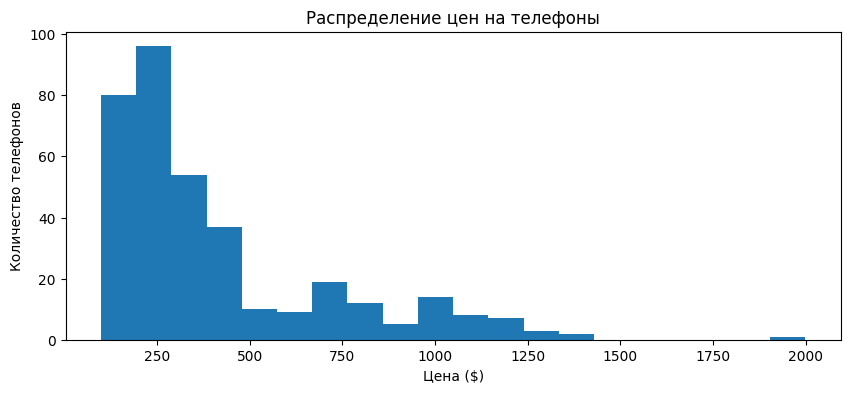

In [262]:
plt.figure(figsize=(10, 4))
plt.hist(phone_price['price_in_dollar'], bins=20)
plt.xlabel('Цена ($)')
plt.ylabel('Количество телефонов')
plt.title('Распределение цен на телефоны')
plt.show()

### Распределение объёма оперативной памяти



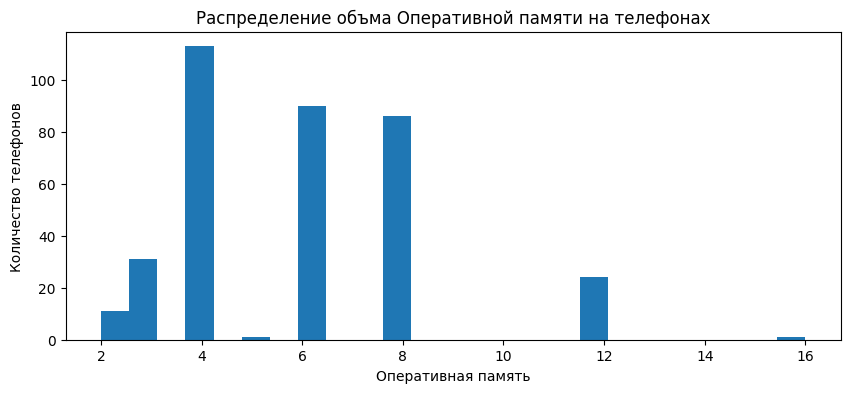

In [260]:
plt.figure(figsize=(10, 4))
plt.hist(phone_price['ram'], bins=25)
plt.xlabel('Оперативная память')
plt.ylabel('Количество телефонов')
plt.title('Распределение объма Оперативной памяти на телефонах')
plt.show()

### Распределение телефонов по брендам

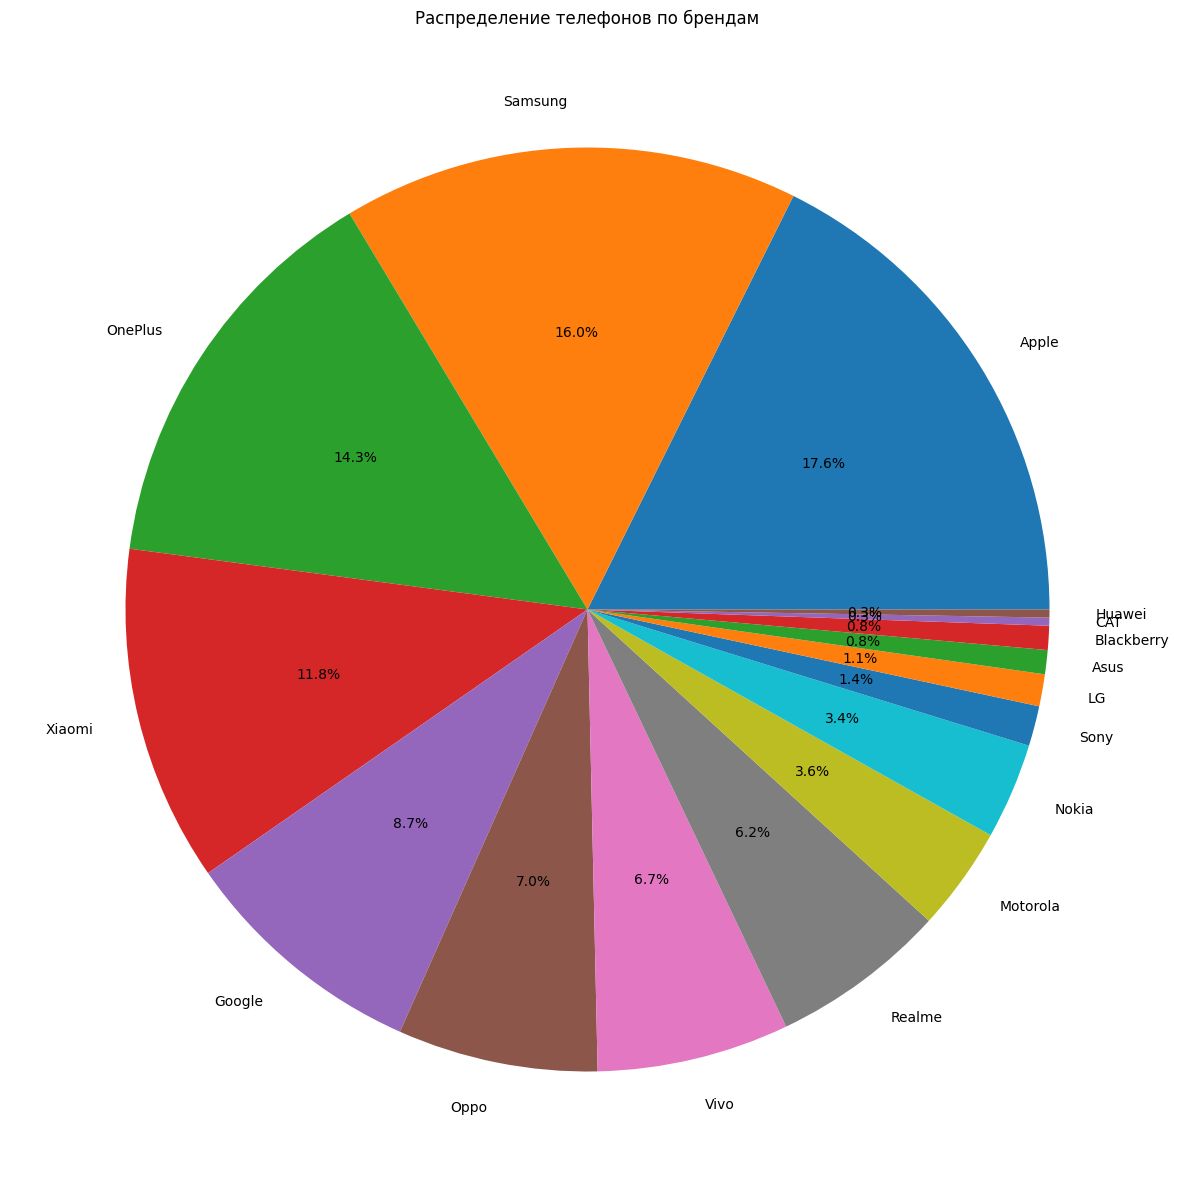

In [261]:
plt.figure(figsize=(15, 15))
plt.pie(phone_price['brand'].value_counts(), labels= phone_price['brand'].unique(), autopct='%1.1f%%')
plt.title('Распределение телефонов по брендам')
plt.show()

### Распределение телефонов по обьему памяти

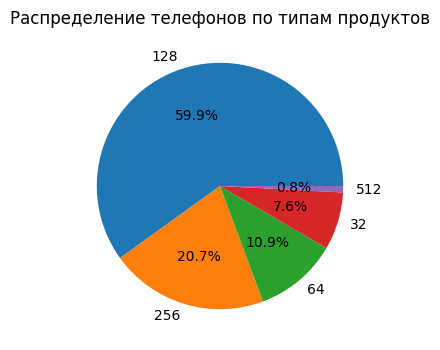

In [269]:
plt.figure(figsize=(10, 4))
plt.pie(phone_price['storage'].value_counts(), labels=phone_price['storage'].unique(), autopct='%1.1f%%')
plt.title('Распределение телефонов по типам продуктов')
plt.show()

### Диаграмма рассеяния: зависимость цены от обьема памяти

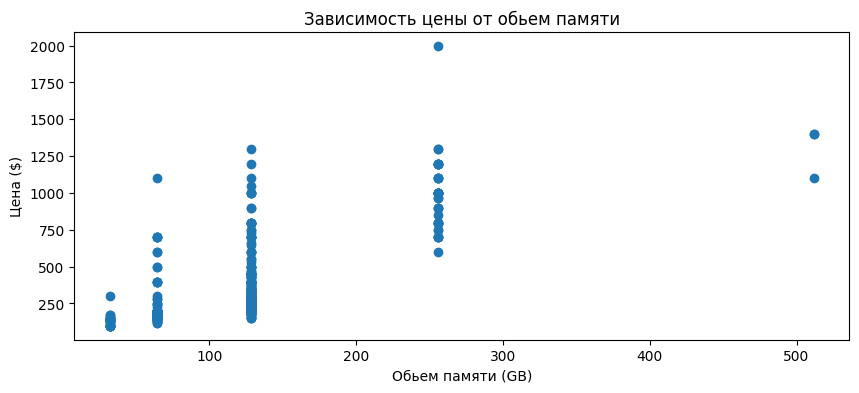

In [273]:
plt.figure(figsize=(10, 4))
plt.scatter(phone_price['storage'], phone_price['price_in_dollar'])
plt.xlabel('Обьем памяти (GB)')
plt.ylabel('Цена ($)')
plt.title('Зависимость цены от обьем памяти')
plt.show()

## 2. Диаграммы, библиотека Seaborn

In [274]:
phone_price

,brand,model,storage,ram,screen_size_in_inches,camera_in_mp,battery_capacity_in_mah,price_in_dollar
0,Apple,iPhone13Pro,128,6,6.10,36.0,3095,999
1,Samsung,GalaxyS21Ultra,256,12,6.80,140.0,5000,1199
2,OnePlus,9Pro,128,8,6.70,108.0,4500,899
3,Xiaomi,RedmiNote10Pro,128,6,6.67,79.0,5020,279
4,Google,Pixel6,128,8,6.40,62.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30Lite,128,4,6.15,58.0,3340,329
402,Samsung,GalaxyNote205G,128,8,6.70,88.0,4300,1049
403,Xiaomi,Mi10Lite5G,128,6,6.57,60.0,4160,349
404,Apple,iPhone12ProMax,128,6,6.70,36.0,3687,1099


### Pairplot для изучения взаимосвязей между числовыми переменными

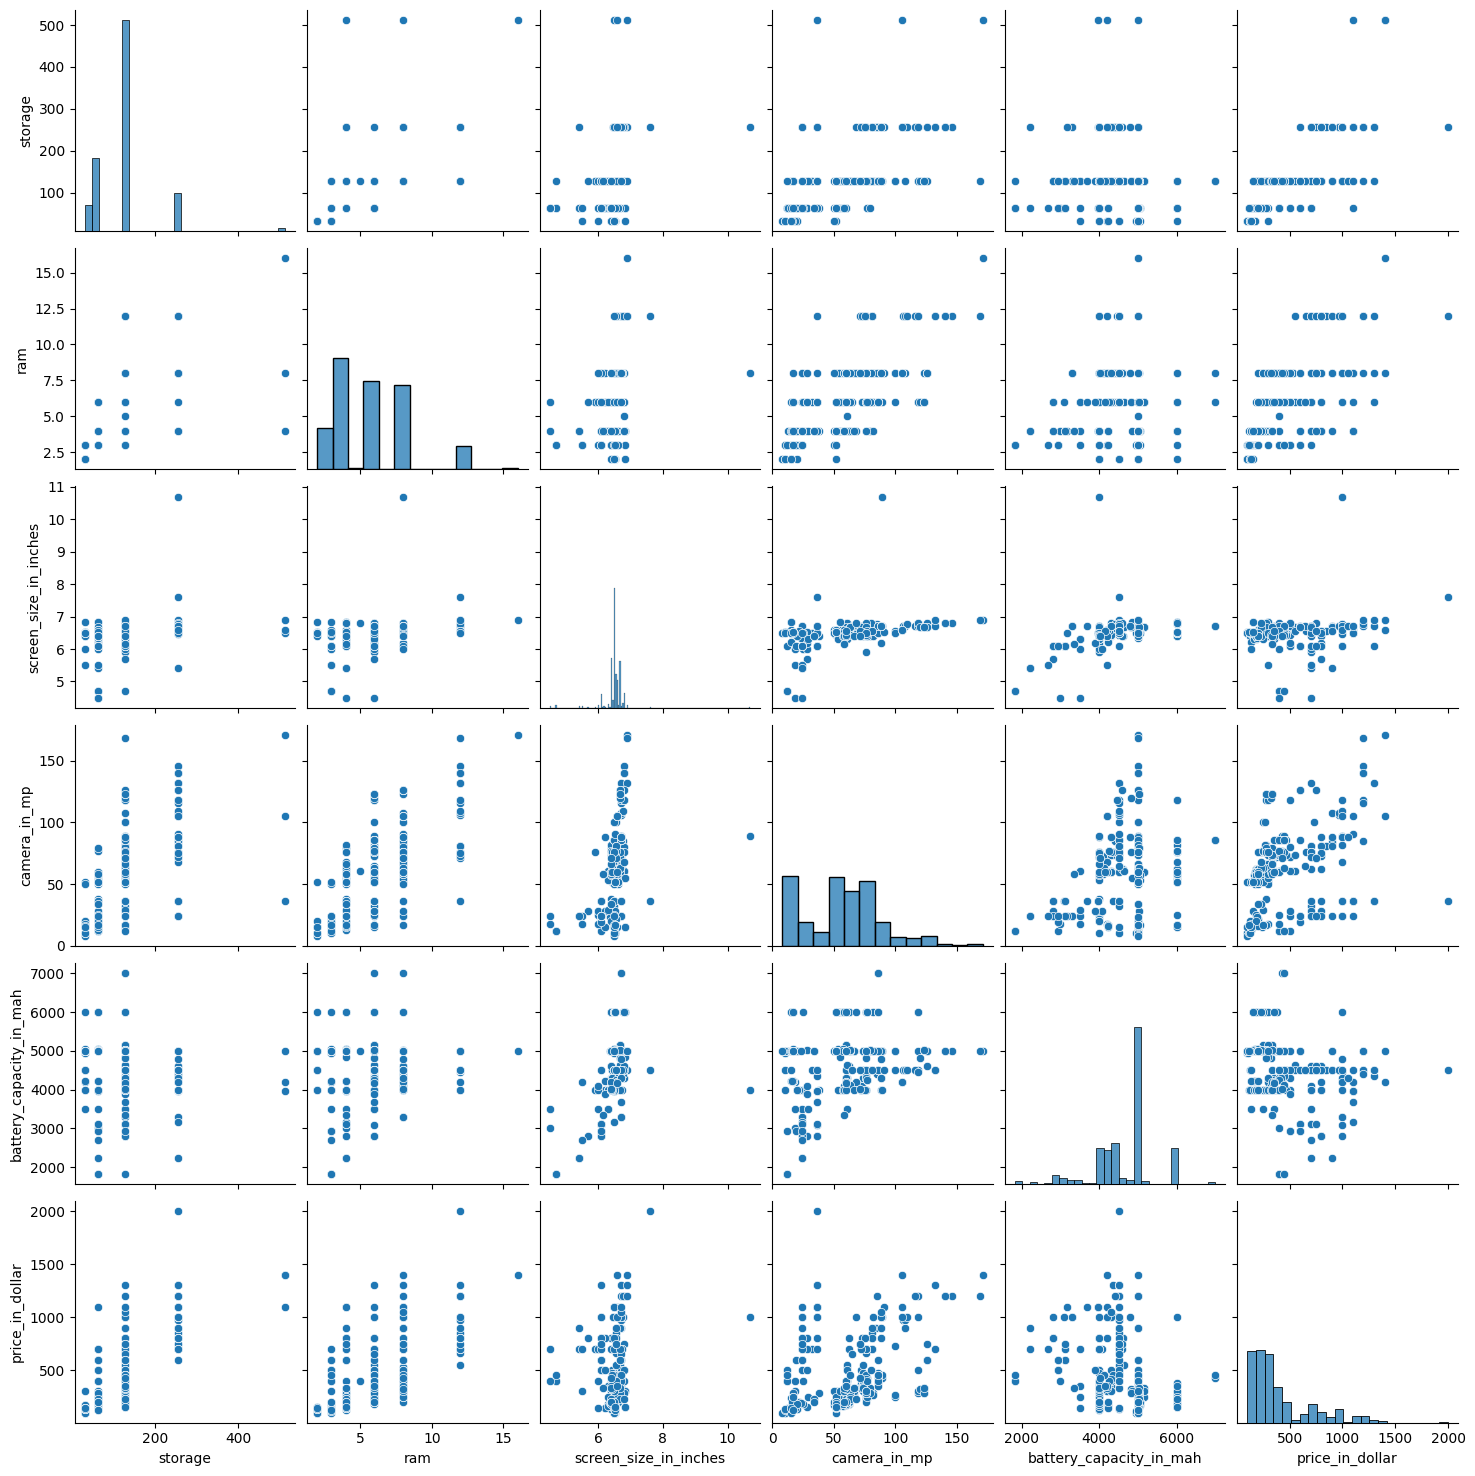

In [275]:
sns.pairplot(phone_price[['storage', 'ram', 'screen_size_in_inches', 'camera_in_mp', 'battery_capacity_in_mah', 'price_in_dollar']])
plt.show()

### Сравнение средней цены телефонов с отличным друг от друга брендом

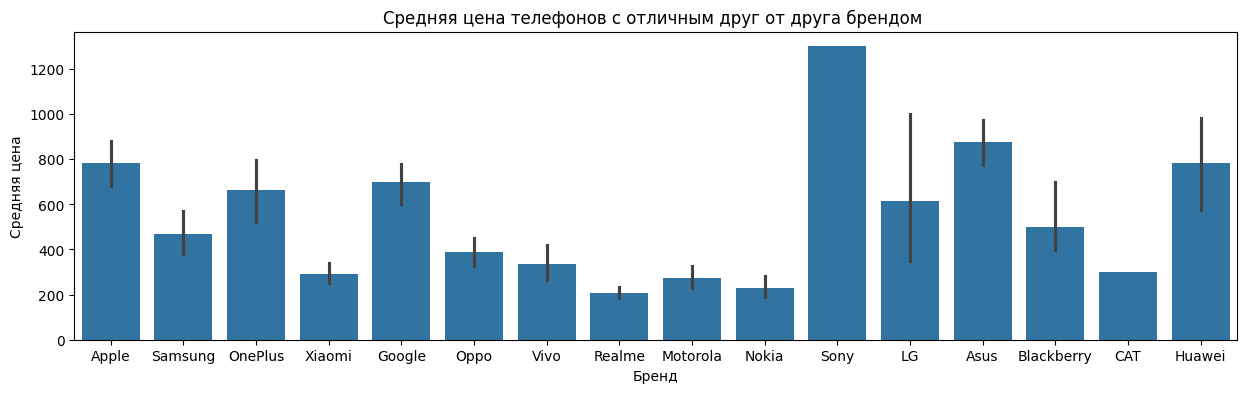

In [314]:
plt.figure(figsize=(15, 4))
sns.barplot(x='brand', y='price_in_dollar', data=phone_price, estimator=np.mean)
plt.title('Средняя цена телефонов с отличным друг от друга брендом ')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.show()

### Распределение телефонов по обьему внутренней памяти

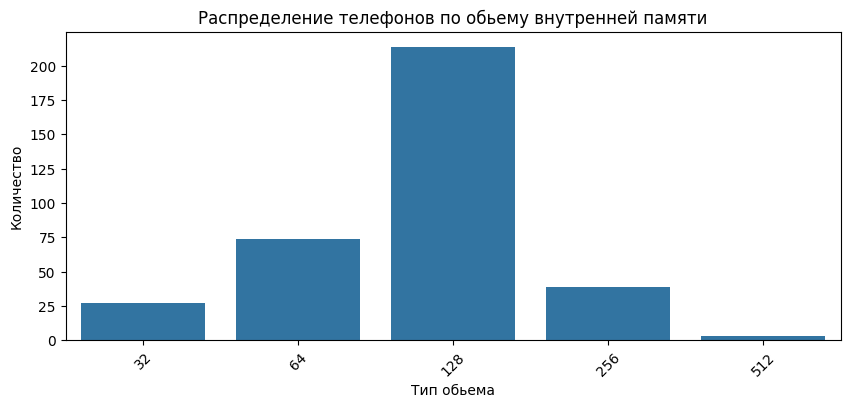

In [320]:
storage_counts = phone_price['storage'].value_counts()
storage_filter = storage_counts[storage_counts > 1].index
phone_price_filter = phone_price[phone_price['storage'].isin(storage_filter)]

plt.figure(figsize=(10, 4))
sns.countplot(x='storage', data=phone_price_filter)
plt.title('Распределение телефонов по обьему внутренней памяти')
plt.xlabel('Тип обьема')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

### Распределение телефонов по оперативной памяти

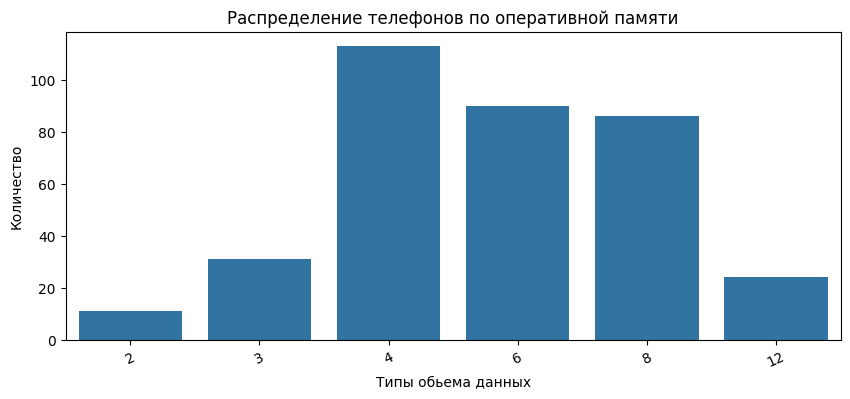

In [318]:
ram_counts = phone_price['ram'].value_counts()
ram_filter = ram_counts[ram_counts > 1].index
ram_price_filter = phone_price[phone_price['ram'].isin(ram_filter)]

plt.figure(figsize=(10, 4))
sns.countplot(x='ram', data=ram_price_filter)
plt.title('Распределение телефонов по оперативной памяти')
plt.xlabel('Типы обьема данных')
plt.ylabel('Количество')
plt.xticks(rotation=25)
plt.show()

### Определение телефонов по качеству камеры в мегпикселях

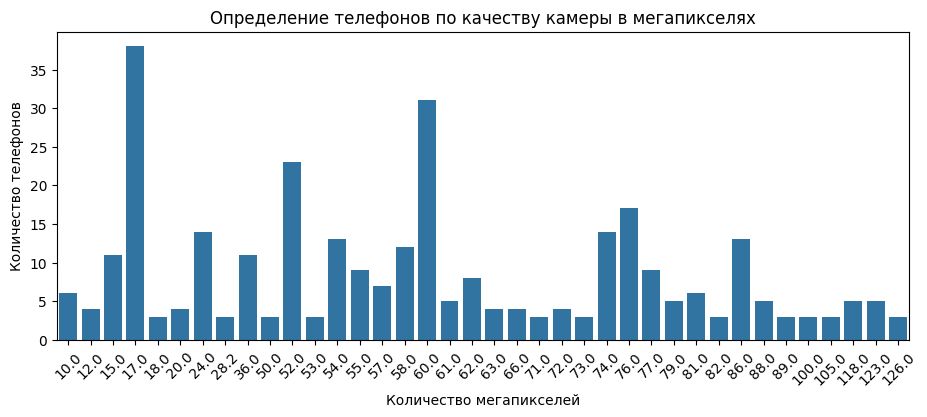

In [312]:
camera_in_mp_counts = phone_price['camera_in_mp'].value_counts()
camera_in_mp_filter = camera_in_mp_counts[camera_in_mp_counts > 2].index
mobile_filter = phone_price[phone_price['camera_in_mp'].isin(camera_in_mp_filter)]

plt.figure(figsize=(11, 4))
sns.countplot(x='camera_in_mp', data=mobile_filter)
plt.title('Определение телефонов по качеству камеры в мегапикселях')
plt.xlabel('Количество мегапикселей')
plt.ylabel('Количество телефонов')
plt.xticks(rotation=45)
plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

## *Среднестатистический телефон соответствует следующим параметрам:*

* Выпущен брендом **`Apple`** или **`Sony`**
* Обьем внутренней памяти составляет **`128 GB`**
* Цена находится в диапозоне **`300-800 ($)`**
* Опертивная память составляет **`4 GB`**
* Камера в **`16`** мегапикселей

# Общий вывод по проекту

### **В выбранном мной Датасете, я изучал данные о телефонах, выявил ошибки, изучил цены, характеристики. Создал графики для более глубокого понимания информации и составил профиль типичного покупателя.**

### **Данный Датасет полезен тем, что помогает понять цены на современные гаджеты, а так же будет полезен тем, кто желает создать свой бренд телефона**

### **Всё это было реализовано благодаря платформе Google Colab, использованию Python-а и таких библиотек как: Pandas, NumPy, Seaborn и Matplotlib, текстовый формат был оформлен при помощи языка Markdown**